<a href="https://colab.research.google.com/github/mohammadusmankhan17/MXNET-Apache-GluonCV/blob/main/MXNET_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x55f3780c4000 @  0x7f2e88567615 0x55f33eabc06c 0x55f33eb9beba 0x55f33eabee8d 0x55f33ebb099d 0x55f33eb32fe9 0x55f33eb2db0e 0x55f33eac077a 0x55f33eb32e50 0x55f33eb2db0e 0x55f33eac077a 0x55f33eb2f86a 0x55f33ebb17c6 0x55f33eb2eee2 0x55f33ebb17c6 0x55f33eb2eee2 0x55f33ebb17c6 0x55f33eb2eee2 0x55f33ebb17c6 0x55f33eb2eee2 0x55f33eac069a 0x55f33eb2ec9e 0x55f33eb2de0d 0x55f33eac077a 0x55f33eb2ea45 0x55f33eac069a 0x55f33eb2ea45 0x55f33eb2db0e 0x55f33eac077a 0x55f33eb2f86a 0x55f33eb2db0e
     |████████████████████████████████| 846.0MB 22kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 81kB 9.4MB/s 


In [2]:
!pip install gluoncv

     |████████████████████████████████| 1.1MB 15.9MB/s 
     |████████████████████████████████| 122kB 51.5MB/s 
     |████████████████████████████████| 317kB 48.8MB/s 
     |████████████████████████████████| 14.1MB 245kB/s 
     |████████████████████████████████| 215kB 49.4MB/s 
     |████████████████████████████████| 952kB 48.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 59.4MB/s 
     |████████████████████████████████| 686kB 51.3MB/s 
     |████████████████████████████████| 71kB 12.8MB/s 
     |████████████████████████████████| 3.2MB 49.2MB/s 
     |████████████████████████████████| 962kB 53.3MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 7.4MB 48.6MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879779 sha256=f43623b92f4d6a0dd4248bcbbf5864a52e13c93

#Instance Segmentation

In [1]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

In [2]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|██████████| 131497/131497 [00:02<00:00, 51949.28KB/s]


In [6]:
# im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
#                           'gluoncv/detection/biking.jpg?raw=true',
#                           path='biking.jpg')

im_fname= 'pp.jpg'
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

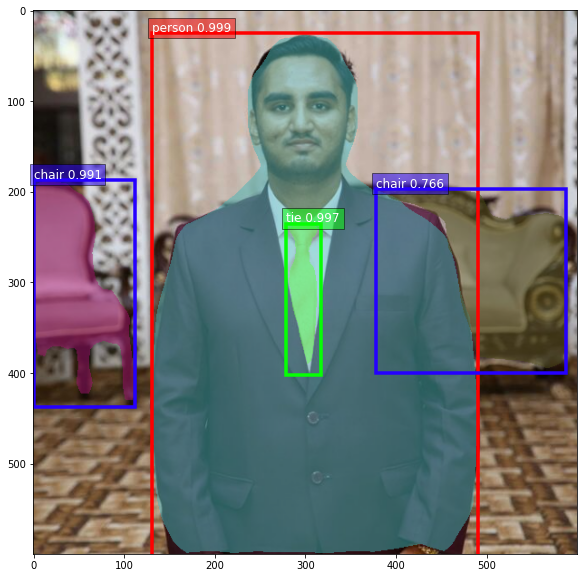

In [7]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

In [8]:
from google.colab import files
uploaded = files.upload()

#Pose Estimation


In [9]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord

In [10]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('simple_pose_resnet18_v1b', pretrained=True)

# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

88993KB [00:01, 51301.67KB/s]                           


55763KB [00:01, 45665.21KB/s]                           


In [15]:
# im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
#                           'gluoncv/pose/soccer.png?raw=true',
#                           path='soccer.png')

im_fname = 'pp.jpg'
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

Shape of pre-processed image: (1, 3, 512, 512)


In [16]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [17]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

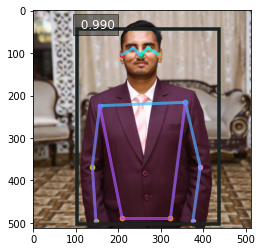

In [18]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

#Semantic Segmentation

In [19]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [21]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
filename = 'example.jpg'
gluoncv.utils.download(url, filename)

100%|██████████| 24/24 [00:00<00:00, 5525.79KB/s]

'example.jpg'

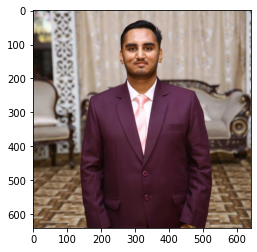

In [23]:
img = image.imread(im_fname)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [24]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [25]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True)

100121KB [00:01, 51004.09KB/s]                           


197333KB [00:03, 56196.08KB/s]                            


In [26]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [27]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

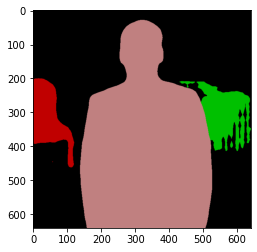

In [28]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()